In [52]:
import numpy as np
import matplotlib.pylab as plt

In [6]:
# MSE
def mean_squared_error(x,y):
    return 0.5*np.sum((x-y)**2)

t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05,0.6,0.0,0.05,0.1,0,0.1,0,0]

mean_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [181]:
#Cross entopy error CEE
def cross_entropy_error(x,y):
    delta = 1e-7 # log의 무한대를 막기위해 아주 작은 값 더함
    return -np.sum(y*np.log(x+delta))

t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05,0.6,0.0,0.05,0.1,0,0.1,0,0]
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [25]:
#mnist load
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test)=\
    load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_test.shape)

(60000, 784)
(10000, 10)


In [27]:
#미니배치
train_size=x_train.shape[0]
batch_size=10
batch_mask= np.random.choice(train_size, batch_size) #np.random.choice(100,10)->0~100중 10개 뽑아 array return
x_batch=x_train[batch_mask] # np.array 는 [ ] 안에 np.array들어가면 인덱싱되서 뽑힘
t_batch=t_train[batch_mask]

In [37]:
#미니배치 CEE
def cross_entropy_error_onehot(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size
def cross_entropy_error_label(y,t):
    if y.ndim == 1:
        t=t.reshape(1,t.size)   # reshape(행,열) 
        y=t.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+ 1e-7)) / batch_size # y[np.arange(batch_size),t] => y[0,3], y[1,2], y[2,5]...

0.1999999999990898


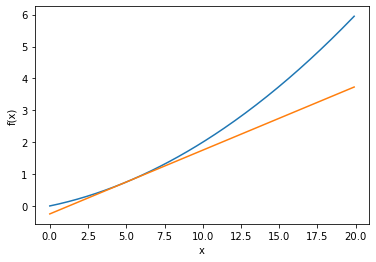

0.2000000165480742
0.1999999999990898


In [65]:
#미분
def numericlal_diff_no_good(f,x):
    h=10e-10                      # h -> 0 을 표현 but 반올림 오차 발생하기 때문에 좋은 방식 x
    return (f(x+h) - f(x)) / h

def numericlal_diff_enhanced(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)  #중심차분

def function_1(x):
    return 0.01*x**2+0.1*x # y=0.01x^2 + 0.1x

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x=np.arange(0.0, 20.0, 0.1)
y=function_1(x)

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.plot(x, y2)
plt.show()

print(numericlal_diff_no_good(function_1,5)) # True Value = 0.2
print(numericlal_diff_enhanced(function_1,5))

In [72]:
#편미분
def function_2(x): # x는 numpy 배열로 가정 np.array
    return x[0]**2+x[1]**2 # or np.sum(x**2)  // f(x)=x0 ^2 + x1 ^2

#x0 =3, x1 =4 일때, x0에 대한 편미분을 구하라
def function_tmp1(x0):
    return x0*x0 +4**2
numericlal_diff_enhanced(function_tmp1,3)
#x0 =3, x1 =4 일때, x1에 대한 편미분을 구하라
def function_tmp2(x1):
    return 3**2 + x1*x1
numericlal_diff_enhanced(function_tmp2,4)

7.999999999999119

In [111]:
#기울기 - 모든 변수의 편미분을 벡터로 정리
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x) #x와 형상이 같고 원소 모두 0인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h)
        x[idx]=float(tmp_val) +h
        fxh1=f(x)
        
        #f(x-h)
        x[idx]=float(tmp_val)-h
        fxh2=f(x)
        
        #grad=f(x+h)-f(x-h)
        grad[idx]=(fxh1-fxh2)/(2*h)  

        x[idx] = tmp_val #r값복원
    return grad

print(numerical_gradient(function_2,np.array([3.,4.])))




[6. 8.]


In [149]:
#경사하강법
def gradient_descent(f, init_x, lr=0.1, step_num=500):
    x=init_x
    x_history=[]
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x-=lr*grad
        x_history.append( x.copy() )
    return x,np.array(x_history)


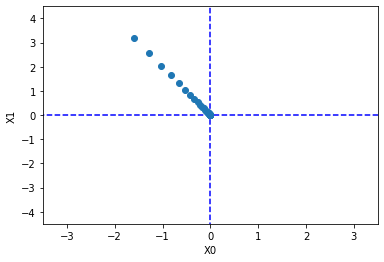

In [150]:
#연습문제 
def func_1(x):
    return x[0]**2 + x[1]**2

x=np.array([-2.0,4.0])
x,x_history=gradient_descent(func_1,init_x=x)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [180]:
#신경망에서의 기울기
def softmax(a):
    c=np.max(a) #오버플로 대책
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a

    return y
# 단층 신경망
class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)
    
    def predict(self,x):
        return(np.dot(x,self.W))
    
    def loss(self, x, t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)
        
        return loss

In [165]:
# 가중치 확인
net=simpleNet()
print(net.W)

# dW는 각 항목이 결과에 미치는 정도를 측정([2,3]이 가장 크게 영향을 끼치는 중 )
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W) #loss 함수에서 가중치 W들의 기울기 => 영향을 주는 정도

print(dW)

[[-0.53327857 -1.09602095 -0.5281871 ]
 [-1.14926112 -1.14821782 -0.47091739]]
[[ 0.17256102  0.36600648 -0.5385675 ]
 [ 0.25884153  0.54900972 -0.80785125]]


In [190]:
#학습알고리즘 구현 - 2층 신경망
from common.functions import *
class TwoLayerNet:
    # 가중치, 편향 초기화
    def __init__(self, input_size, hidden_size, output_size,weight_init_std=0.01):
        self.params={}
        self.params['W1'] = weight_init_std*\
                            np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*\
                            np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
    
    # 예측 함수
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        
        a2=np.dot(a1,W2)+b2
        y=softmax(a2)
        
        return y
    
    #  loss 구하는 함수 (크로스엔트로피 활용)
    def loss(self,x,t):
        y=self.predict(x)
        return cross_entropy_error(y,t)
    
    # accuracy구하는 함수
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t)/float(x.shape[0])
        return accuracy
    
    # 가중치 매개변수의 기울기
    def numerical_gradient1(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # 재귀아님 
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [191]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
x=np.random.rand(100,784)
t=np.random.rand(100,10)
y=net.predict(x)

grads=net.numerical_gradient1(x,t)

In [192]:
grads

{'W1': array([[ 6.02925314e-04, -2.07364497e-04, -2.98540030e-04, ...,
          2.58114847e-04,  1.32293669e-04,  9.63193121e-04],
        [ 6.06876607e-04, -3.59032377e-04, -7.08724612e-05, ...,
          2.12399869e-04,  6.20591667e-05,  1.09767408e-03],
        [ 7.97284581e-04, -2.78494128e-04,  1.69116658e-04, ...,
          2.26678685e-04,  3.23042197e-04,  1.60249868e-03],
        ...,
        [ 7.61640264e-04, -6.76054619e-04, -7.03836722e-05, ...,
          1.06731839e-04,  3.12061981e-04,  1.12277960e-03],
        [ 5.51938342e-04,  1.70669030e-04, -1.12657665e-04, ...,
          4.57613638e-04,  6.25469316e-04,  1.43572866e-03],
        [ 5.89750069e-04, -2.50963392e-04, -3.56239218e-04, ...,
          3.09313084e-04,  3.49852560e-04,  1.07019211e-03]]),
 'b1': array([ 1.16184051e-03, -2.99514205e-04, -2.69059843e-04,  2.74395451e-03,
        -2.26781423e-04, -2.52563939e-04, -1.85231046e-03,  9.41531815e-04,
         1.97358914e-04,  1.39690922e-03, -2.12061679e-03, -2.115

In [194]:
# 학습알고리즘 구현 - 미니 배치
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []

#하이퍼 파라미터
iters_num=1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784 , hidden_size = 50, output_size=10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size,batch_size) #미니 배치 인덱스 추출
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 경사하강법 
    grad = network.numerical_gradient1(x_batch,t_batch) # 함수의 기울기
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key] # 학습률을 곱하여 갱신
    
    #학습경과 기록
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

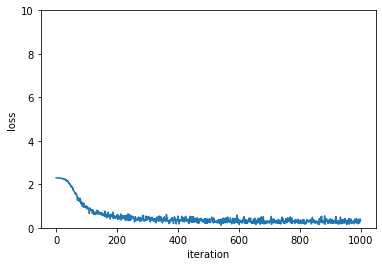

In [197]:
plt.plot(train_loss_list)
plt.ylim(0,10)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()

In [198]:
# 학습알고리즘 구현 - 시험데이터로 평가 (미니배치 구현에서 추가)

# 학습알고리즘 구현 - 미니 배치
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []
train_acc_list=[]
test_acc_list=[]

#하이퍼 파라미터
iters_num=100
train_size = x_train.shape[0]
batch_size = 10
learning_rate = 0.1
network = TwoLayerNet(input_size = 784 , hidden_size = 50, output_size=10)

#1에폭당 반복수
iter_per_epoch=max(train_size/batch_size,1)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size,batch_size) #미니 배치 인덱스 추출
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 경사하강법 
    grad = network.numerical_gradient1(x_batch,t_batch) # 함수의 기울기
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key] # 학습률을 곱하여 갱신
    
    #학습경과 기록
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    #1에폭당 정확도 계산
    if i%iter_per_epoch ==0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : ",str(train_acc),str(test_acc))

train acc, test acc :  0.10468333333333334 0.1035


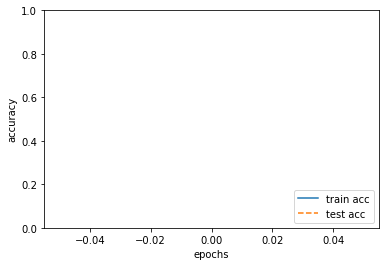

In [199]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()